In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

dataset = 'skrip_v7' # options: skrip_v7, ukr_v3
# Data
skrip_v7_te = 'Data/raw/Skripal/actor_te_edges_df - Skripal.csv'
ukr_v3_te = 'Data/raw/Ukraine/actor_te_edges_df_2022_01_01_2022_05_01 - Ukraine.csv'

if dataset == 'skrip_v7':
    TE_df = pd.read_csv(skrip_v7_te)
elif dataset == 'ukr_v3':
    TE_df = pd.read_csv(ukr_v3_te)

TE_df.head()

,Source,Target,TF_TF,TF_TM,TF_UF,TF_UM,TM_TF,TM_TM,TM_UF,TM_UM,UF_TF,UF_TM,UF_UF,UF_UM,UM_TF,UM_TM,UM_UF,UM_UM,*_*,total_te
0,a28483,a28634,0.0,0.0,0.0,0.0,0.000000,0.005080,0.00000,0.001976,0.000000,0.000096,0.000000,0.000225,0.000000,0.001695,0.000000,0.007564,0.004841,0.033271
1,a28483,a29102,0.0,0.0,0.0,0.0,0.000000,0.001242,0.00000,0.001618,0.000000,0.018728,0.000000,0.000224,0.000000,0.003872,0.000000,0.006954,0.007396,0.065275
2,a28483,a29312,0.0,0.0,0.0,0.0,0.000340,0.000685,0.00034,0.003639,0.000024,0.000048,0.000024,0.000941,0.000390,0.000837,0.015731,0.001936,0.011424,0.049867
3,a28483,a29376,0.0,0.0,0.0,0.0,0.000000,0.016899,0.00000,0.009002,0.000000,0.000024,0.000000,0.000224,0.000000,0.000416,0.000000,0.003223,0.003940,0.059575
4,a28483,a29597,0.0,0.0,0.0,0.0,0.001033,0.002474,0.00034,0.002986,0.000072,0.000172,0.000024,0.000224,0.001263,0.001327,0.000416,0.003700,0.023271,0.028063


In [10]:
sumS = TE_df.loc[TE_df['Source'] == 'a28483', 'TM_TM'].sum()
print(sumS)

2.953225052


In [11]:
def layer_correlation(df, source, target):
    sum_of_numerator = 0
    sum_of_denominator = 0
    for index, row in df.iterrows():
        if row[source] > 0 and row[target] > 0:
            sum_of_numerator += 1
        else:
            sum_of_numerator += 0
    
    for index, row in df.iterrows():
        if row[target] > 0:
            sum_of_denominator += 1
        else:
            sum_of_denominator += 0
    
    return sum_of_numerator / sum_of_denominator
    

In [12]:
print(layer_correlation(TE_df, 'TM_TM', 'TM_UM'))

0.9800401234253592


In [13]:
print(layer_correlation(TE_df, 'TF_TF', 'UM_UM'))

0.16517073114921027


In [19]:
from src import generate_edge_types
edge_types = generate_edge_types.generate_edge_types()
edge_types.remove('total_te')
df_heatmap = pd.DataFrame(index = range(16), columns = edge_types)
df_heatmap.index = edge_types
df_heatmap

,UF_UF,UF_UM,UF_TF,UF_TM,UM_UF,UM_UM,UM_TF,UM_TM,TF_UF,TF_UM,TF_TF,TF_TM,TM_UF,TM_UM,TM_TF,TM_TM
UF_UF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF_UM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF_TF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UF_TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UM_UF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UM_UM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UM_TF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UM_TM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TF_UF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TF_UM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


AttributeError: 'Axes' object has no attribute 's1'

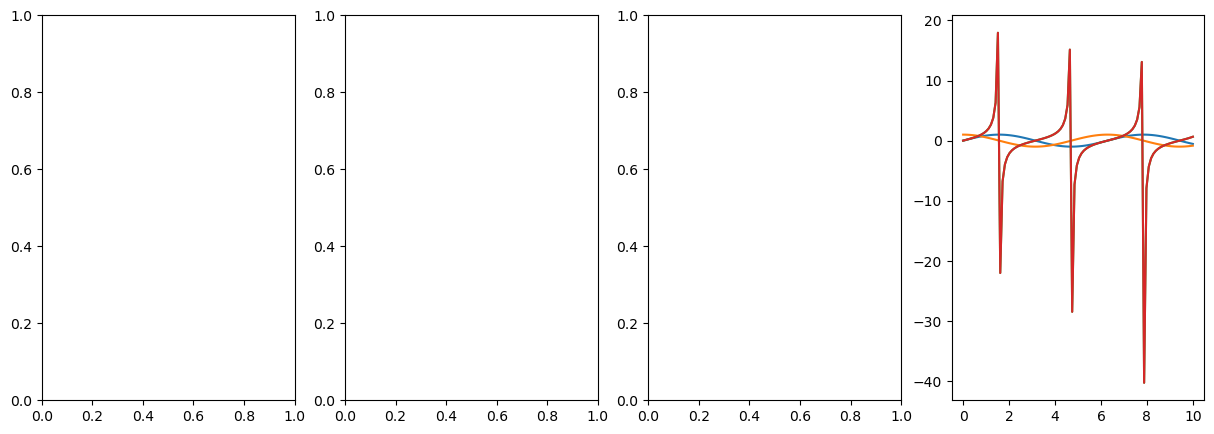

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.tan(x)

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Plot the data on each subplot
s1 = plt.plot(x, y1, label='sin(x)')
s2 = plt.plot(x, y2, label='cos(x)')
s3 = plt.plot(x, y3, label='tan(x)')
s4 = plt.plot(x, y3, label='tan(x)')
axes[0].s1.show()
axes[0].set_title('Plot 1')

axes[1].s2
axes[1].set_title('Plot 2')

axes[2].s3
axes[2].set_title('Plot 3')

axes[3].s4
axes[3].set_title('Plot 4')

# Add legend
for ax in axes:
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


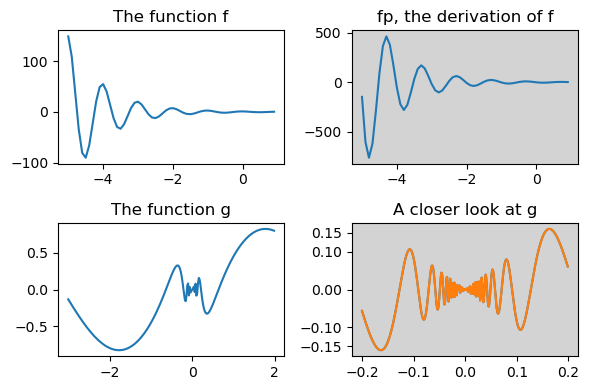

In [6]:
import numpy as np
from numpy import e, pi, sin, exp, cos
import matplotlib.pyplot as plt

def f(t):
    return exp(-t) * cos(2*pi*t)

def fp(t):
    return -2*pi * exp(-t) * sin(2*pi*t) - e**(-t)*cos(2*pi*t)

def g(t):
    return sin(t) * cos(1/(t+0.1))

def g(t):
    return sin(t) * cos(1/(t))


python_course_green = "#476042"
fig = plt.figure(figsize=(6, 4))

t = np.arange(-5.0, 1.0, 0.1)

sub1 = fig.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('The function f') # non OOP: plt.title('The function f')
sub1.plot(t, f(t))


sub2 = fig.add_subplot(222, facecolor="lightgrey")
sub2.set_title('fp, the derivation of f')
sub2.plot(t, fp(t))


t = np.arange(-3.0, 2.0, 0.02)
sub3 = fig.add_subplot(223)
sub3.set_title('The function g')
sub3.plot(t, g(t))

t = np.arange(-0.2, 0.2, 0.001)
sub4 = fig.add_subplot(224, facecolor="lightgrey")
sub4.set_title('A closer look at g')
sub4.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
sub4.set_yticks([-0.15, -0.1, 0, 0.1, 0.15])
sub4.plot(t, g(t))

plt.plot(t, g(t))

plt.tight_layout()
plt.show()

/var/folders/sg/61724z6s33x4hc9rymcn33780000gn/T/ipykernel_13200/3076611168.py:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


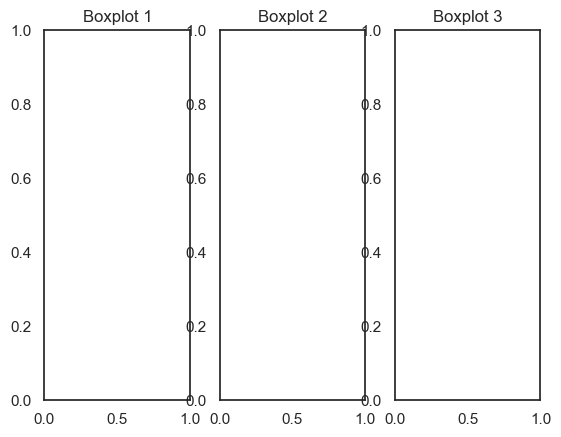

In [20]:
import matplotlib.pyplot as plt

# Plot the boxes
ax1 = plt.boxplot([1, 2, 3])
ax2 = plt.boxplot([4, 5, 6])
ax3 = plt.boxplot([7, 8, 9])

# Put the boxes side by side
plt.subplot(1, 3, 1)
plt.title('Boxplot 1')
plt.subplot(1, 3, 2)
plt.title('Boxplot 2')
plt.subplot(1, 3, 3)
plt.title('Boxplot 3')

# Show the plot
plt.show()


/var/folders/sg/61724z6s33x4hc9rymcn33780000gn/T/ipykernel_13200/3587198475.py:17: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x=data[:, i], y=data[:, j], kind="scatter", marginal_kws=dict(bins=25, fill=False), ax=axes[i, j])
/var/folders/sg/61724z6s33x4hc9rymcn33780000gn/T/ipykernel_13200/3587198475.py:17: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x=data[:, i], y=data[:, j], kind="scatter", marginal_kws=dict(bins=25, fill=False), ax=axes[i, j])
/var/folders/sg/61724z6s33x4hc9rymcn33780000gn/T/ipykernel_13200/3587198475.py:17: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x=data[:, i], y=data[:, j], kind="scatter", marginal_kws=dict(bins=25, fill=False), ax=axes[i, j])
/var/folders/sg/61724z6s33x4hc9rymcn33780000gn/T/ipykernel_13200/3587198475.py:17: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(x=data[:, i], y=data[:, j], kind="scatter",

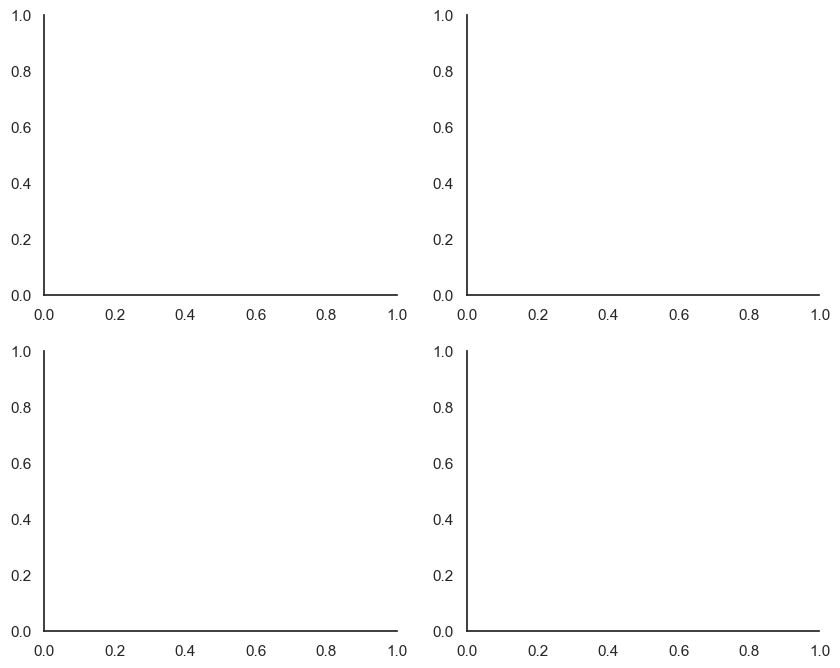

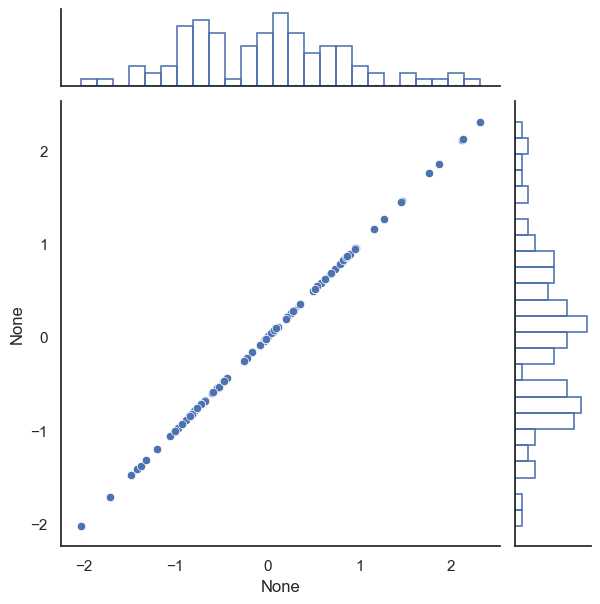

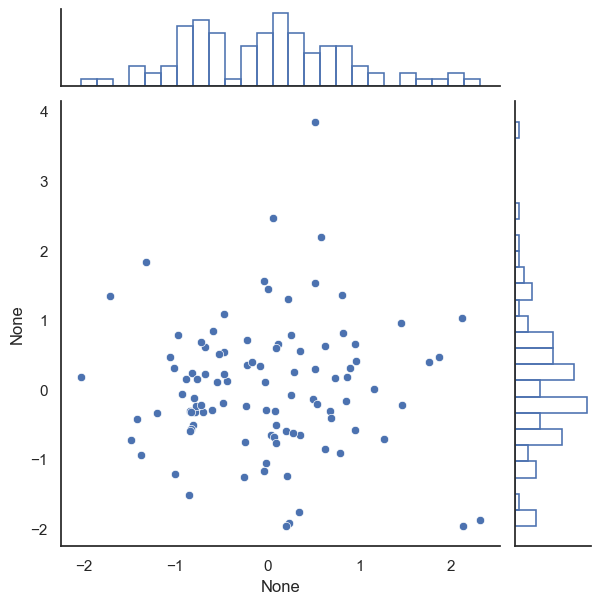

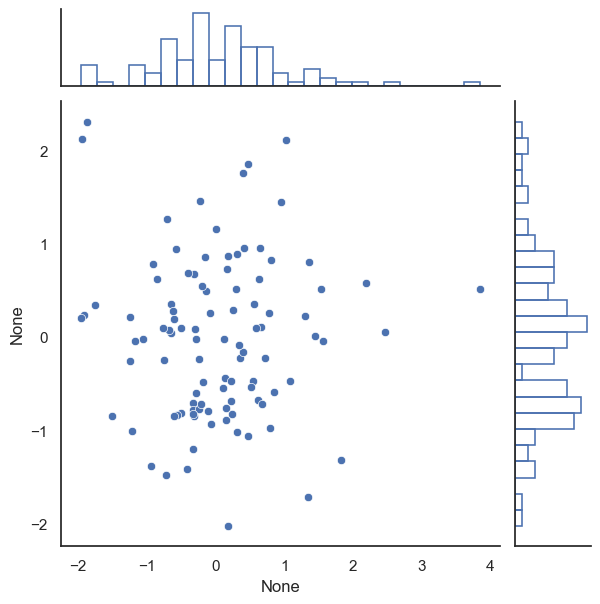

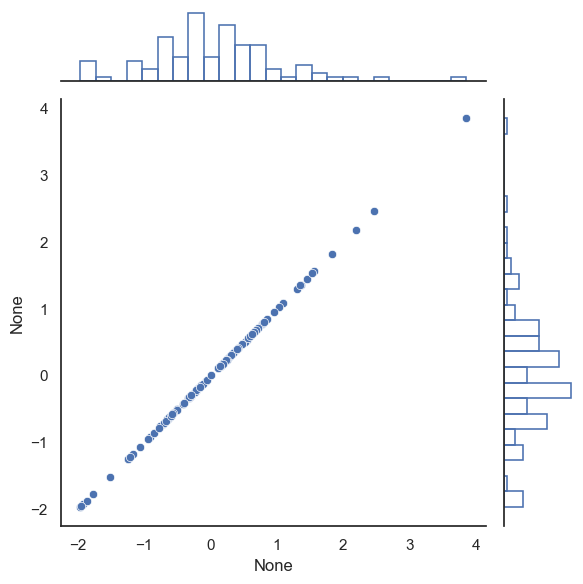

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set up random data for the joint plots
np.random.seed(42)
data = np.random.normal(size=(100, 4))

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Create joint plots for each pair of variables
for i in range(2):
    for j in range(2):
        sns.set(style="white", color_codes=True)
        sns.despine()
        sns.jointplot(x=data[:, i], y=data[:, j], kind="scatter", marginal_kws=dict(bins=25, fill=False), ax=axes[i, j])
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Show the figure
plt.show()


In [22]:
import pandas as pd
import networkx as nx

# Load data from CSV
df = pd.read_csv('/Users/sinaabdi/Downloads/roadNet-CA-edited.csv')  # Replace 'your_data.csv' with the actual CSV file path

# Create a directed graph from the CSV data
G = nx.from_pandas_edgelist(df, source='FromNodeId', target='ToNodeId', create_using=nx.DiGraph())

# Save the graph to a GML file
nx.write_gml(G, '/Users/sinaabdi/Downloads/output_graph.gml')  # 'output_graph.gml' is the output GML file path


KeyError: 'FromNodeId'

In [10]:
import pandas as pd
import numpy as np

# Create an empty DataFrame
empty_df = pd.DataFrame()

# Create 5 sample DataFrames with some data
df1 = pd.DataFrame({'A': np.random.rand(5)})
df2 = pd.DataFrame({'B': np.random.rand(5)})
df3 = pd.DataFrame({'C': np.random.rand(3)})
df4 = pd.DataFrame({'D': np.random.rand(5)})
df5 = pd.DataFrame({'E': np.random.rand(5)})

# Add columns from different DataFrames to the empty DataFrame
# empty_df = pd.concat([empty_df, df1], axis=1)
# empty_df = pd.concat([empty_df, df2], axis=1)
# empty_df = pd.concat([empty_df, df3], axis=1)
# empty_df = pd.concat([empty_df, df4], axis=1)
# empty_df = pd.concat([empty_df, df5], axis=1)
for i in [df1, df2, df3, df4, df5]:
    empty_df = pd.concat([empty_df, i], axis=1, ignore_index=True)

empty_df.fillna(0, inplace=True)
# Display the resulting DataFrame
print(empty_df)

          0         1         2         3         4
0  0.252864  0.135479  0.811464  0.871330  0.122338
1  0.675054  0.401454  0.910613  0.326752  0.503845
2  0.952334  0.667202  0.411616  0.462415  0.551708
3  0.424562  0.528539  0.000000  0.593762  0.641382
4  0.870395  0.703785  0.000000  0.306952  0.490294


In [14]:
import pandas as pd
import numpy as np

# Create 5 sample DataFrames with sorted columns
dataframes = [
    pd.DataFrame({'A': [4, 2, 7], 'B': [8, 1, 6]}),
    pd.DataFrame({'C': [6, 3, 9], 'D': [5, 2, 7]}),
    pd.DataFrame({'E': [9, 5, 2], 'F': [1, 7, 4]}),
    pd.DataFrame({'G': [3, 7, 1], 'H': [9, 4, 2]}),
    pd.DataFrame({'I': [8, 4, 2], 'J': [7, 5, 1]})
]

# Extract and concatenate the first columns, then sort the values
result_df = pd.concat([df.iloc[:, 0] for df in dataframes], axis=1)
result_df = pd.DataFrame(np.sort(result_df.values, axis=0), columns=result_df.columns)

# Display the resulting DataFrame
print(result_df)


   A  C  E  G  I
0  2  3  2  1  2
1  4  6  5  3  4
2  7  9  9  7  8


In [17]:
dataset_list = ['Skripal', 'Ukraine', 'Anniversary', 'Biden', 'Bucha_crimes','crimes_un_report','Khersion_retreat',
                'Mariupol_hospital','Mariupol_theater','Putin_warrant','Russia_mobilize','Russian_missle_cross_Poland',
                'tanks','Zelensky_visit_the_US']
columns_name = ['Skripal','Ukraine','Anniversary','Biden','Bucha Crimes','Crimes UN Report','Khersion Retreat',
                'Mariupol Hospital','Mariupol Theater','Putin Warrant','Russia Mobilize','Russian Missle Cross Poland',
                'Tanks','Zelensky Visit the US']
new_dic = dict()
for i,j in enumerate(dataset_list):
    new_dic[j] = columns_name[i]
print(new_dic)

{'Skripal': 'Skripal', 'Ukraine': 'Ukraine', 'Anniversary': 'Anniversary', 'Biden': 'Biden', 'Bucha_crimes': 'Bucha Crimes', 'crimes_un_report': 'Crimes UN Report', 'Khersion_retreat': 'Khersion Retreat', 'Mariupol_hospital': 'Mariupol Hospital', 'Mariupol_theater': 'Mariupol Theater', 'Putin_warrant': 'Putin Warrant', 'Russia_mobilize': 'Russia Mobilize', 'Russian_missle_cross_Poland': 'Russian Missle Cross Poland', 'tanks': 'Tanks', 'Zelensky_visit_the_US': 'Zelensky Visit the US'}


In [15]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'A': [1, 2, 3],
        'B': [4, 5, 6],
        'C': [7, 8, 9]}

df = pd.DataFrame(data)

# Find the maximum value in the entire DataFrame
max_value = df.values.max()

# Display the maximum value
print("Maximum value in the DataFrame:", max_value)


Maximum value in the DataFrame: 9


In [16]:
import seaborn as sns

# Get a list of all available Seaborn color palettes
all_seaborn_palettes = sns.palettes.SEABORN_PALETTES.keys()

# Display the list of all Seaborn palettes
print(list(all_seaborn_palettes))


['deep', 'deep6', 'muted', 'muted6', 'pastel', 'pastel6', 'bright', 'bright6', 'dark', 'dark6', 'colorblind', 'colorblind6']
